In [1]:
import imp
from time import sleep, time

#import pupil.pupil_src.main as pup_start
import pupil_cam_aquire_save as pup
import zmq_socket as zmqs

import matplotlib.pyplot as plt
import pupil.pupil_src.shared_modules.file_methods as pupfm
import analysis_funcs.bdd_analysis as bda
import bdd_
#import bdd_driveratt.eye_tracking.analysis.code.functions.et_helper as eth

## Start Instance of Pupil Source
python ./pupil/pupil_src/main.py capture   
OR   
just click the GUI

In [3]:
pupil_port = 41227#command line start
#pupil_port = 50020 #gui start

save_dir_name = '/home/vasha/code/backpack_computer_aquisition/test/pupil'
collection_minutes=0.5

In [8]:
imp.reload(pup)
pup.run_pupillabs_aquisition(save_dir_name, collection_minutes, pupil_port)

PUPIL_CAM Connecting to socket at 127.0.0.1:41227 ...
Timesync successful.
PUPIL_CAM Beginning Recording for max 0.5 mins...
/home/vasha/code/backpack_computer_aquisition/test/pupil
You Pressed s!
You Pressed e!
You Pressed s!
You Pressed s!
You Pressed e!
PUPIL_CAM Finished PupilLabs Aquisition.


## Read in Data

### Pupil Timestamps

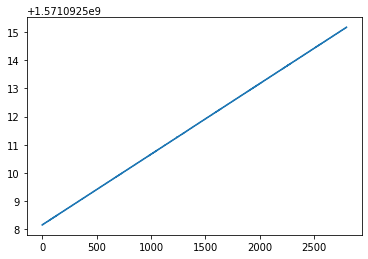

In [4]:
import numpy as np
import os
data_location = os.path.join(save_dir_name, '000', 'pupil_timestamps.npy')
location = np.load(data_location)
plt.plot(location)

### Annotation Timestamps

In [5]:
data_location = os.path.join(save_dir_name, '000', 'annotation_timestamps.npy')
np.load(data_location)

array([1.57109251e+09, 1.57109251e+09])

In [6]:
data_dir = os.path.join(save_dir_name, '000')
topic = 'annotation'
pl_dict = pupfm.load_pldata_file(data_dir, topic)
pl_dict.data

deque([Serialized_Dict(mappingproxy({'topic': 'annotation', 'label': 'start_trial', 'timestamp': 1571092509.1114008, 'duration': 0})),
       Serialized_Dict(mappingproxy({'topic': 'annotation', 'label': 'end_trial', 'timestamp': 1571092514.1154115, 'duration': 0}))])

In [34]:
data_dir = os.path.join(save_dir_name, '000')
topic = 'gaze'
pl_dict = pupfm.load_pldata_file(data_dir, topic)
d = pl_dict.data
d[0].items
#https://docs.pupil-labs.com/developer/core/recording-format/
#https://github.com/pupil-labs/pupil/blob/315188dcfba9bef02a5b1d9a3770929d7510ae2f/pupil_src/shared_modules/file_methods.py#L138

<bound method Serialized_Dict.items of Serialized_Dict(mappingproxy({'topic': 'gaze.2d.0.', 'norm_pos': (0.3222132295096035, 0.4806806169587855), 'confidence': 0.9333008924742835, 'timestamp': 1571092508.157983, 'base_data': (mappingproxy({'topic': 'pupil.0', 'circle_3d': mappingproxy({'center': (-4.450793603154887, 0.4918485622113815, 80.2787850183525), 'normal': (-0.4219704711408478, 0.15443767041557976, -0.8933587898721207), 'radius': 2.6047828299663474}), 'confidence': 0.9333008924742835, 'timestamp': 1571092508.157983, 'diameter_3d': 5.209565659932695, 'ellipse': mappingproxy({'center': (61.864940065843875, 99.70932154391319), 'axes': (34.96888023671294, 40.24114014168146), 'angle': -18.886408925438488}), 'norm_pos': (0.3222132295096035, 0.4806806169587855), 'diameter': 40.24114014168146, 'sphere': mappingproxy({'center': (0.6128520505352862, -1.3614034827755757, 90.99909049681794), 'radius': 12.0}), 'projected_sphere': mappingproxy({'center': (100.17551724151753, 86.7244110384776

In [38]:
d[0].items

<bound method Serialized_Dict.items of Serialized_Dict(mappingproxy({'topic': 'gaze.2d.0.', 'norm_pos': (0.3222132295096035, 0.4806806169587855), 'confidence': 0.9333008924742835, 'timestamp': 1571092508.157983, 'base_data': (mappingproxy({'topic': 'pupil.0', 'circle_3d': mappingproxy({'center': (-4.450793603154887, 0.4918485622113815, 80.2787850183525), 'normal': (-0.4219704711408478, 0.15443767041557976, -0.8933587898721207), 'radius': 2.6047828299663474}), 'confidence': 0.9333008924742835, 'timestamp': 1571092508.157983, 'diameter_3d': 5.209565659932695, 'ellipse': mappingproxy({'center': (61.864940065843875, 99.70932154391319), 'axes': (34.96888023671294, 40.24114014168146), 'angle': -18.886408925438488}), 'norm_pos': (0.3222132295096035, 0.4806806169587855), 'diameter': 40.24114014168146, 'sphere': mappingproxy({'center': (0.6128520505352862, -1.3614034827755757, 90.99909049681794), 'radius': 12.0}), 'projected_sphere': mappingproxy({'center': (100.17551724151753, 86.7244110384776

In [19]:
imp.reload(bda)
pldata = bda.raw_pl_data(datapath=data_dir)
bda.gaze_to_pandas(pldata.data)

/home/vasha/code/backpack_computer_aquisition/test/pupil/000/pupil_data
Newer pupil capture used


KeyError: 'base_data'

In [18]:
data.data

deque([Serialized_Dict(mappingproxy({'topic': 'pupil.0', 'circle_3d': mappingproxy({'center': (-4.450793603154887, 0.4918485622113815, 80.2787850183525), 'normal': (-0.4219704711408478, 0.15443767041557976, -0.8933587898721207), 'radius': 2.6047828299663474}), 'confidence': 0.9333008924742835, 'timestamp': 1571092508.157983, 'diameter_3d': 5.209565659932695, 'ellipse': mappingproxy({'center': (61.864940065843875, 99.70932154391319), 'axes': (34.96888023671294, 40.24114014168146), 'angle': -18.886408925438488}), 'norm_pos': (0.3222132295096035, 0.4806806169587855), 'diameter': 40.24114014168146, 'sphere': mappingproxy({'center': (0.6128520505352862, -1.3614034827755757, 90.99909049681794), 'radius': 12.0}), 'projected_sphere': mappingproxy({'center': (100.17551724151753, 86.72441103847765), 'axes': (163.5181178049282, 163.5181178049282), 'angle': 90.0}), 'model_confidence': 0.896760673075081, 'model_id': 12, 'model_birth_timestamp': 1571092462.2289314, 'theta': 1.7258545967490073, 'phi'